In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import os
from missingpy import MissForest
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from scipy import stats
import statsmodels as sm
from statsmodels.stats.weightstats import ztest
from statsmodels.imputation import mice
import plotly

In [4]:
%matplotlib inline

# @grellert: removendo warnings chatos
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [5]:
df = pd.read_csv(os.path.join('D:/', 'bolsa PIBIC', 'Covid19_Data', 'csv', 'Kaggle_Sirio_Libanes_ICU_Prediction.csv'))

In [6]:
# df = df.dropna()
# print(df)

In [7]:
np.where(pd.isnull(df))

(array([   0,    0,    0, ..., 1923, 1923, 1923], dtype=int64),
 array([ 13,  14,  15, ..., 190, 191, 192], dtype=int64))

In [8]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
TH_CATEGORICO = 5
categoricos = [] 
string = []
quantitativos = []
nao_numericos = []

for col in df:
    # print(col, df[col].unique())
    unicos = df[col].unique()
    ## dividindo colunas entre valores categoricos e quantitativos:
    if unicos.shape[0] < TH_CATEGORICO:
        categoricos.append(col)
    elif type(unicos[0]) is str:
        string.append(col)
    else: 
        quantitativos.append(col)
# print(f'colunas categoricas: {categoricos}, quantitativas: {quantitativos}, str: {string}')

# col = ['total_cases', 'total_deaths', 'total_deaths_per_million', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'population', 'median_age', 'aged_70_older', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers']
df_res = df[quantitativos].iloc[:, 171:181]
print(df_res)
mice_col = []
for i in df_res:
    mice_col.append(i)

      HEART_RATE_DIFF  RESPIRATORY_RATE_DIFF  TEMPERATURE_DIFF  \
0           -1.000000              -1.000000         -1.000000   
1           -1.000000              -1.000000         -1.000000   
2                 NaN                    NaN               NaN   
3                 NaN                    NaN         -1.000000   
4            0.114504               0.176471         -0.238095   
...               ...                    ...               ...   
1920        -1.000000              -1.000000         -1.000000   
1921        -1.000000              -1.000000         -1.000000   
1922        -1.000000              -1.000000         -1.000000   
1923        -1.000000              -1.000000         -1.000000   
1924        -0.633588              -0.647059         -0.547619   

      OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  \
0                  -1.000000                         -1.000000   
1                  -1.000000                         -1.000000   
2        

In [10]:
df_res = df_res.dropna()
df = pd.DataFrame(df_res)

In [11]:
# grellert: deprecated
def mean_of(data):
    _mean = 0
    _std = 0
    _median = 0
    _min_ = 0
    _max_ = 0
    for i in range(len(data)):
        _mean += data[i][0]
        _std += data[i][1]
        _median += data[i][2]
        _min_ += data[i][3]
        _max_ += data[i][4]
    mean = round(_mean/len(data), 4)
    std = round(_std/len(data), 4)
    median = round(_median/len(data), 4)
    min_ = round(_min_/len(data), 4)
    max_ = round(_max_/len(data), 4)
    return [mean, std, median, min_, max_]

In [12]:
def compare (df1, df2, class_data):
    mean= df2.mean() - df1.mean()
    std= df2.std() - df1.std()
    median = df2.median() - df1.median()
    minim = df2.min() - df1.min()
    maxim = df2.max() - df1.max()
    # @grellert: adicionando correlacao
    if class_data is not None:
        corr_diff = np.corrcoef(df2, class_data)[0][1] - np.corrcoef(df1, class_data)[0][1]
        return [mean, std, median, minim, maxim, corr_diff]
    return [mean, std, median, minim, maxim]

In [13]:
def imputation_test (k,df_,col,method):
    df = df_
    n_rows = df.shape[0]
    df_compare = []
    
    k_ = int(n_rows*k/100)
    to_nan = rd.sample(range(n_rows), k_)  # seleciona aleatorimente k% do numero de linhas total
    
    df[col].iloc[to_nan] = np.nan  

    if method == 'mean':
        df[col] = df[col].replace(np.nan, df[col].mean())

    elif method == 'median':
        imputer = SimpleImputer(strategy = 'median')
#         df[col] = df[col].replace(np.nan, df[col].median())
        imputer = imputer.fit(np.array(df[col]).reshape(-1,1))
        df[col] = imputer.transform(np.array(df[col]).reshape(-1,1))
        
    elif method == 'mode':
        imputer = SimpleImputer(strategy = 'most_frequent')
#         df[col] = df[col].replace(np.nan, df[col].median())
        imputer = imputer.fit(np.array(df[col]).reshape(-1,1))
        df[col] = imputer.transform(np.array(df[col]).reshape(-1,1))
    # @grellert: tornando o método mais expansível
    elif method == 'knn' in method:
        # k = method.split('_')[1]
        imputer = KNNImputer(n_neighbors = 5)
        imputed_data = imputer.fit_transform(df)
        df_temp = pd.DataFrame(imputed_data)
        df_temp.columns = df.columns
        df[col] = df_temp[col]  # update only the desired column
        
    elif method == 'missforest':
        imputer = MissForest(verbose=0, n_estimators = 10, max_depth = 10, max_iter = 2 )
        imputed_data = imputer.fit_transform(df)
        df_temp = pd.DataFrame(imputed_data)
        df_temp.columns = df.columns
        df[col] = df_temp[col]
        
    elif method == 'iterative_imputer': ##still incorrect
        imp_mean = IterativeImputer()
        # recebe todo o DataFrame e retorna um np.array com todas as colunas com missing imputadas
        array_imp = imp_mean.fit_transform(df[mice_col])
        df = pd.DataFrame(array_imp, columns = mice_col)
        
    elif method == 'empty':
        return df
    else:
        print("method not available or invalid")
        return None
    return df
        

In [14]:
def test_column(df_, col, method, class_col):
    compare_means = []
    compare_data = []
    k = [x for x in range(5,100,5)]
    for j in range(len(k)):
        for i in range(50):
            df_imp = df_.copy()
            df_imp = imputation_test(k[j], df_imp, col, method)
            if df_imp is None:
                continue
            row = [method, k[j], col]
            row += compare(df_[col], df_imp[col], class_data = df[class_col])
            compare_data.append(row)
    if class_col:
        return pd.DataFrame(compare_data, columns = ['imputation method', 'pct imputed', 'attribute', 'Δmean', 'Δstd', 'Δmedian', 'Δmin', 'Δmax','Δcorrel'])
    return pd.DataFrame(compare_data, columns = ['imputation method', 'pct imputed', 'attribute', 'Δmean', 'Δstd', 'Δmedian', 'Δmin', 'Δmax' ])
    

In [15]:
def generate_results(df, method):
    df_nan = df.copy()  # df auxiliar utilizando apenas as colunas quantitativas
    data = [] # array que armazenará os dados do dataframe resultante
    data_ = []
    df_vis1 = [] # array que armazenará o df resultante de cada coluna de df_nan
    for col in df.columns:
        print(col)
        data = test_column(df_nan, col, method, class_col = 'OXYGEN_SATURATION_DIFF')
        df_vis1.append(pd.DataFrame(data = data))
    print("done")
    df_vis = pd.concat(df_vis1)
    return df_vis

# Teste de imputação

In [16]:
df_vis1 = generate_results(df, 'mean')
df_vis2 = generate_results(df, 'median')
df_vis3 = generate_results(df, 'mode')

HEART_RATE_DIFF
RESPIRATORY_RATE_DIFF
TEMPERATURE_DIFF
OXYGEN_SATURATION_DIFF
BLOODPRESSURE_DIASTOLIC_DIFF_REL
BLOODPRESSURE_SISTOLIC_DIFF_REL
HEART_RATE_DIFF_REL
RESPIRATORY_RATE_DIFF_REL
TEMPERATURE_DIFF_REL
OXYGEN_SATURATION_DIFF_REL
done
HEART_RATE_DIFF
RESPIRATORY_RATE_DIFF
TEMPERATURE_DIFF
OXYGEN_SATURATION_DIFF
BLOODPRESSURE_DIASTOLIC_DIFF_REL
BLOODPRESSURE_SISTOLIC_DIFF_REL
HEART_RATE_DIFF_REL
RESPIRATORY_RATE_DIFF_REL
TEMPERATURE_DIFF_REL
OXYGEN_SATURATION_DIFF_REL
done
HEART_RATE_DIFF
RESPIRATORY_RATE_DIFF
TEMPERATURE_DIFF
OXYGEN_SATURATION_DIFF
BLOODPRESSURE_DIASTOLIC_DIFF_REL
BLOODPRESSURE_SISTOLIC_DIFF_REL
HEART_RATE_DIFF_REL
RESPIRATORY_RATE_DIFF_REL
TEMPERATURE_DIFF_REL
OXYGEN_SATURATION_DIFF_REL
done


In [17]:
df_vis_mice = generate_results(df, 'iterative_imputer')

HEART_RATE_DIFF
RESPIRATORY_RATE_DIFF
TEMPERATURE_DIFF
OXYGEN_SATURATION_DIFF
BLOODPRESSURE_DIASTOLIC_DIFF_REL
BLOODPRESSURE_SISTOLIC_DIFF_REL
HEART_RATE_DIFF_REL
RESPIRATORY_RATE_DIFF_REL
TEMPERATURE_DIFF_REL
OXYGEN_SATURATION_DIFF_REL
done


In [18]:
def generate_vis(df_vis, coluna):
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 30))
    
    sns.boxplot(ax=axes[0], x = 'pct imputed', y = 'Δmean', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette= 'Pastel1',showfliers = False); axes[0].set_title(coluna) 
    sns.boxplot(ax=axes[1], x = 'pct imputed', y = 'Δmedian', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette= 'Pastel1',showfliers = False); 
    sns.boxplot(ax=axes[2], x = 'pct imputed', y = 'Δstd', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette= 'Pastel1',showfliers = False); 
#     sns.boxplot(ax=axes[3], x = 'pct imputed', y = 'Δmin', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette = 'Pastel1', showfliers = False); 
#     sns.boxplot(ax=axes[4], x = 'pct imputed', y = 'Δmax', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette = 'Pastel1', showfliers = False); 
    sns.boxplot(ax=axes[3], x = 'pct imputed', y = 'Δcorrel', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette= 'Pastel1',showfliers = False); 
        
    axes[0].axhline(y=0, linestyle = '--')
    axes[1].axhline(y=0, linestyle = '--')
    axes[2].axhline(y=0, linestyle = '--')
    axes[3].axhline(y=0, linestyle = '--')


## Mostrar efeitos de uma coluna não imputada

In [19]:
coluna = []
for i in df:
    coluna.append(i)
df_vis_emp = generate_results(df, 'empty')


HEART_RATE_DIFF
RESPIRATORY_RATE_DIFF


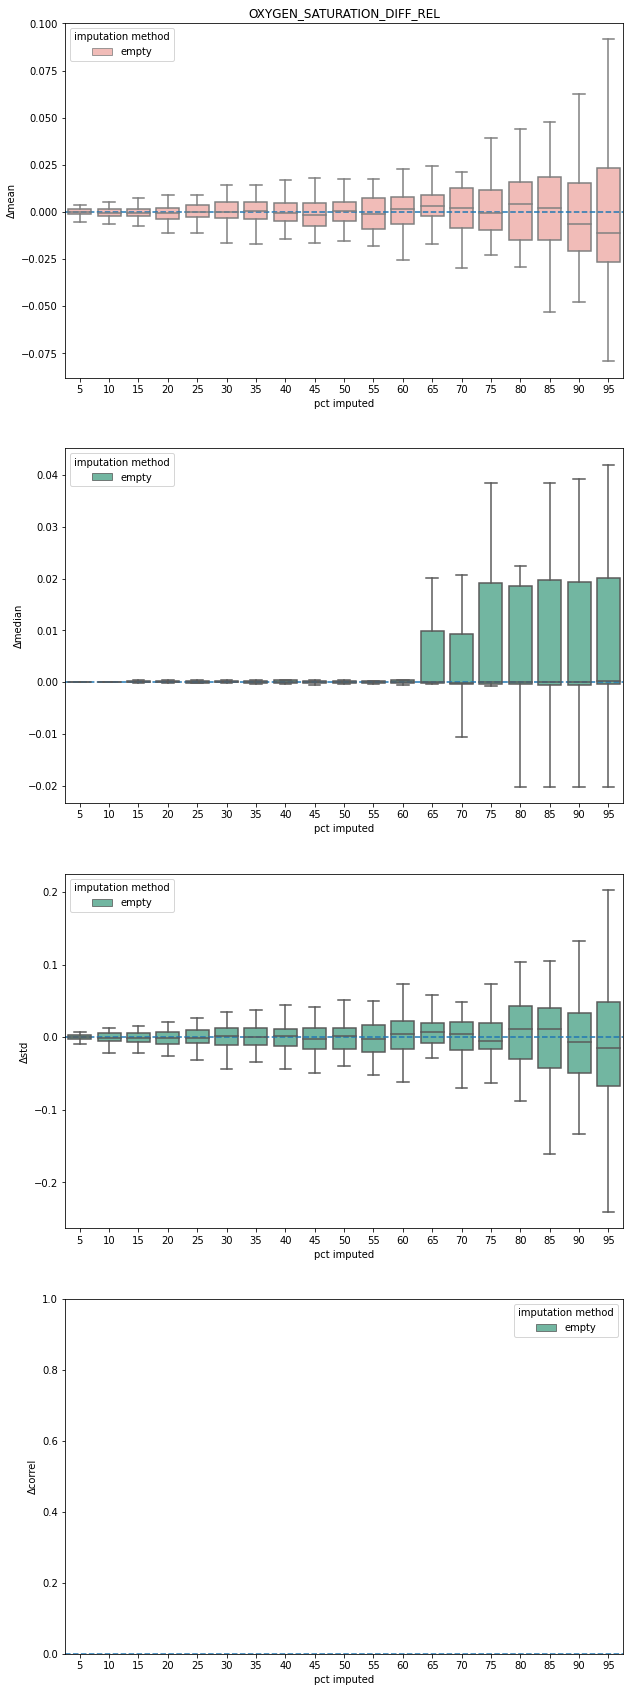

In [ ]:
generate_vis(df_vis_emp, coluna[9])

## Média, Mediana e Moda

In [ ]:
df_vis = pd.concat([df_knn, df_vis_mice])
coluna = []
for i in df:
    coluna.append(i)
generate_vis(df_vis, coluna[2])

NameError: name 'pd' is not defined

## KNN

HEART_RATE_DIFF
RESPIRATORY_RATE_DIFF
TEMPERATURE_DIFF
OXYGEN_SATURATION_DIFF
BLOODPRESSURE_DIASTOLIC_DIFF_REL
BLOODPRESSURE_SISTOLIC_DIFF_REL
HEART_RATE_DIFF_REL
RESPIRATORY_RATE_DIFF_REL
TEMPERATURE_DIFF_REL
OXYGEN_SATURATION_DIFF_REL
done


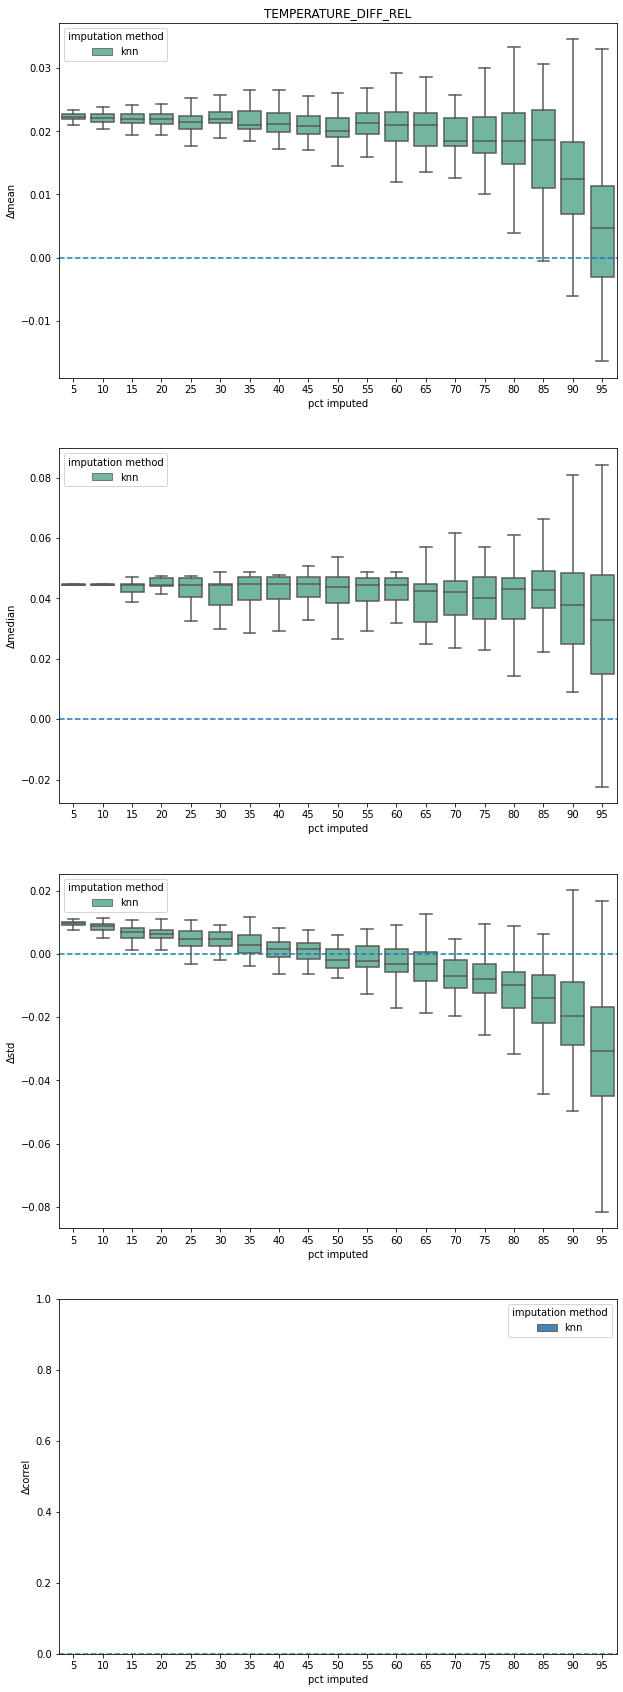

In [ ]:
coluna = []
for i in df:
    coluna.append(i)
df_knn = generate_results(df, 'knn')
df_vis = pd.concat([df_knn, df_vis_mice])
generate_vis(df_vis, coluna[2])

## MICE

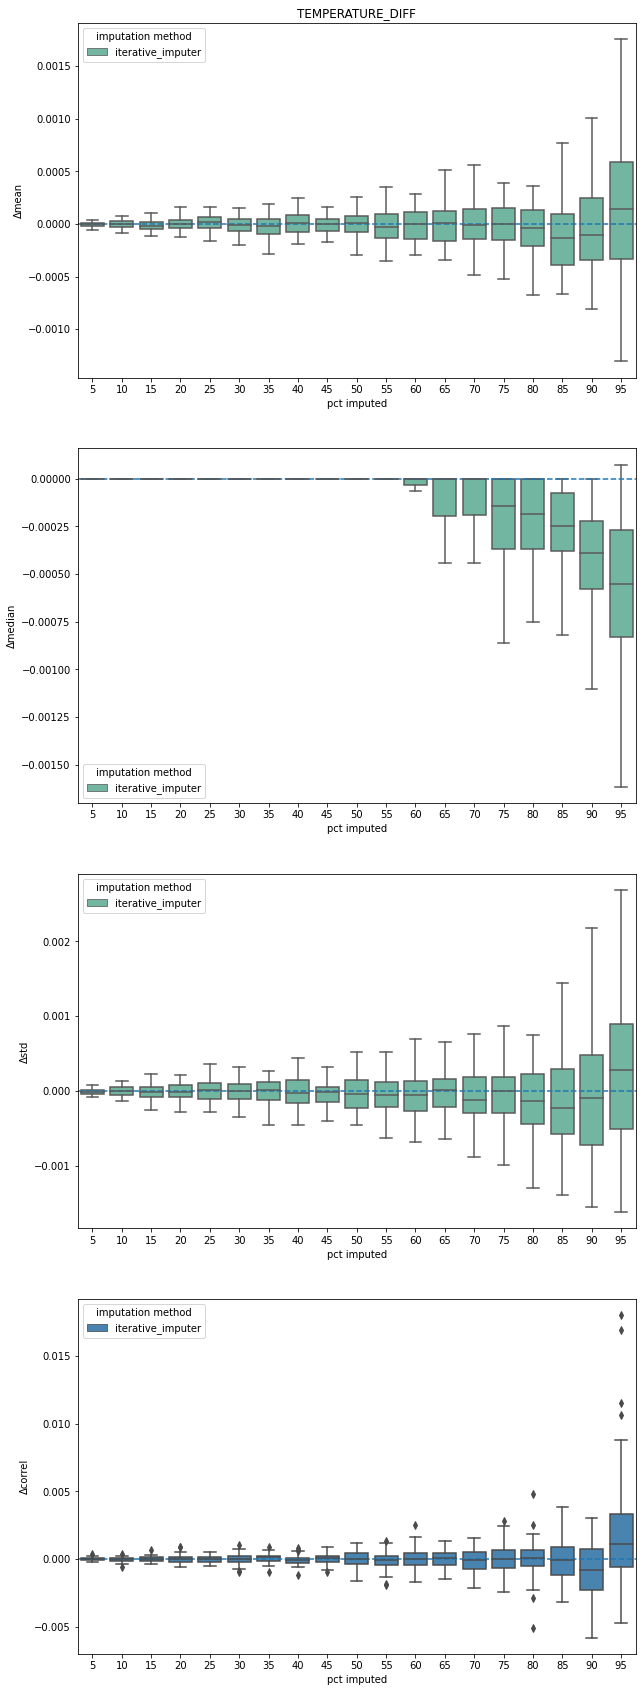

In [ ]:
coluna = []
for i in df_res:
    coluna.append(i)
generate_vis(df_vis_mice, coluna[2])